## Some necessary preprocessing

In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Seaborn for plotting and styling
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv',encoding='latin1' , index_col=0)

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Seaborn's plotting functions.
One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a ***scatter plot*** is just one line of code using the **`lmplot()` function.**

There are two ways you can do so.

-The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
<br>
-The second way is to directly pass in Series of data to the axes arguments.<br>

For example, let's compare the Attack and Defense stats for our Pokémon:

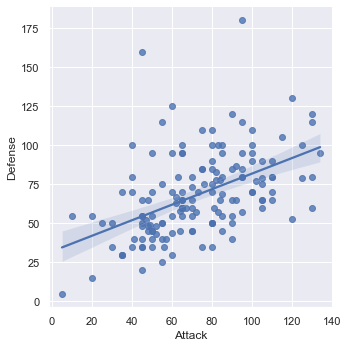

In [7]:
# Recommended way
sns.set(rc = {'figure.figsize':(15,8)})
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Seaborn doesn't have a dedicated scatter plot function, which is why there is a diagonal line. We actually used Seaborn's function for fitting and plotting a **regression line.**

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()`:

-First, we'll set `fit_reg=False` to remove the regression line, since we only want a scatter plot.
-Then, we'll set `hue='Stage'` to color our points by the Pokémon's evolution stage. This **hue** argument is very useful because it allows you to express a third dimension of information using color.

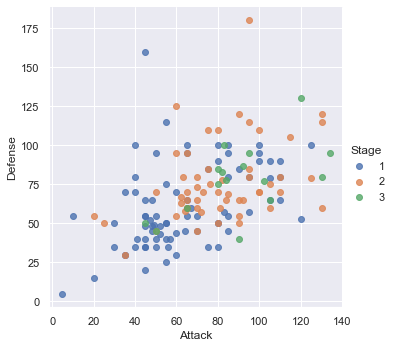

In [8]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

## Importance of Pandas

**Pandas** actually plays a very important role. Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a **box plot** for our Pokémon's combat stats:

<AxesSubplot:>

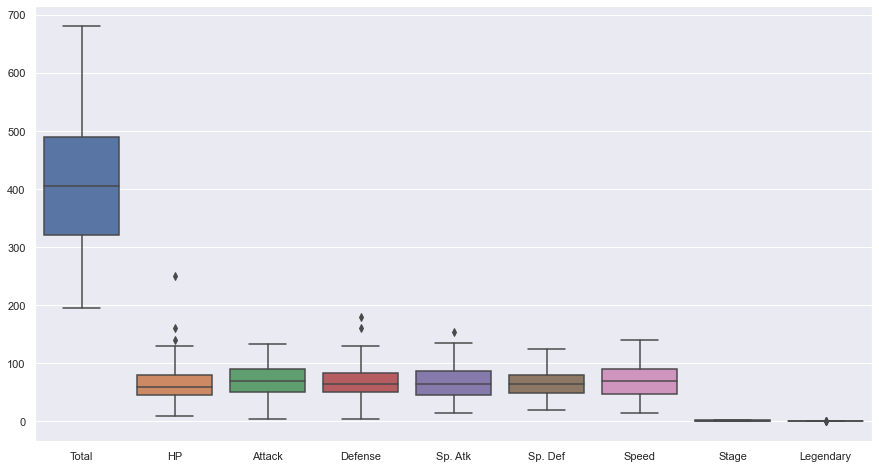

In [9]:
# Boxplot
sns.boxplot(data=df)


Well, that's a reasonable start, but there are some columns we'd probably like to remove:

-We can remove the Total since we have individual stats.<br>
-We can remove the Stage and Legendary columns because they aren't combat stats.<br>
It turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

<AxesSubplot:>

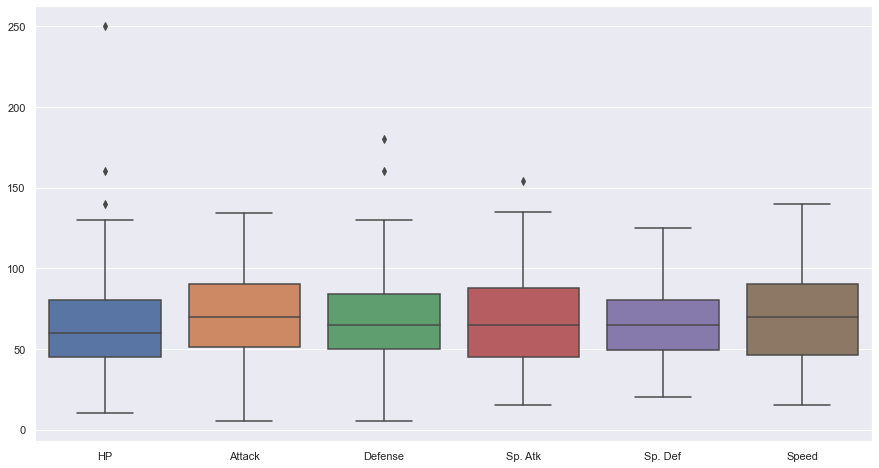

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a **violin plot.**

-Violin plots are useful alternatives to box plots.<br>
-They show the distribution (through the thickness of the violin) instead of only the summary statistics.

For example, we can visualize the distribution of Attack by Pokémon's primary type:

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

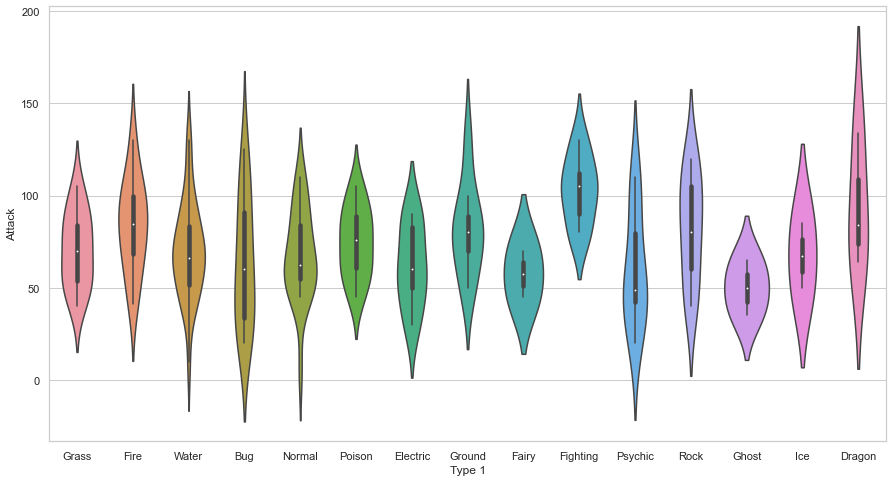

In [11]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

## Color palettes.
Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Using Bulbapedia to create a new color palette:

In [12]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

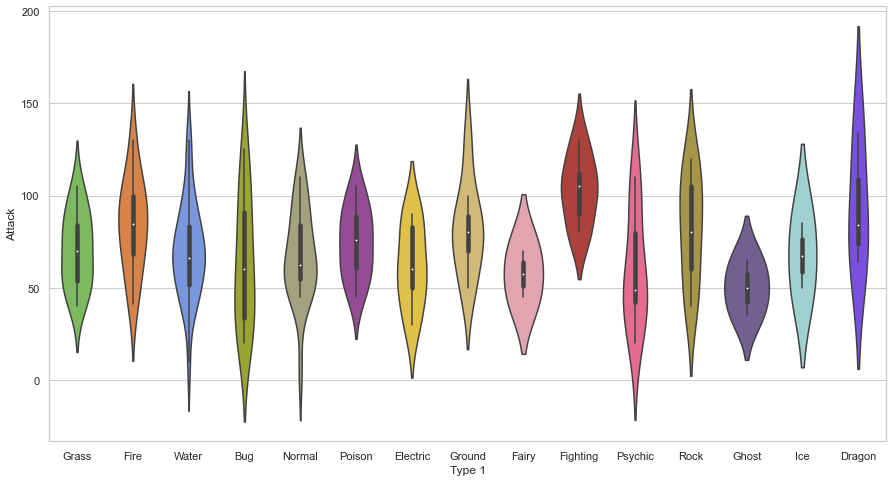

In [13]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the **swarm plot** comes in. This visualization will show each point, while "stacking" those with similar values:

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

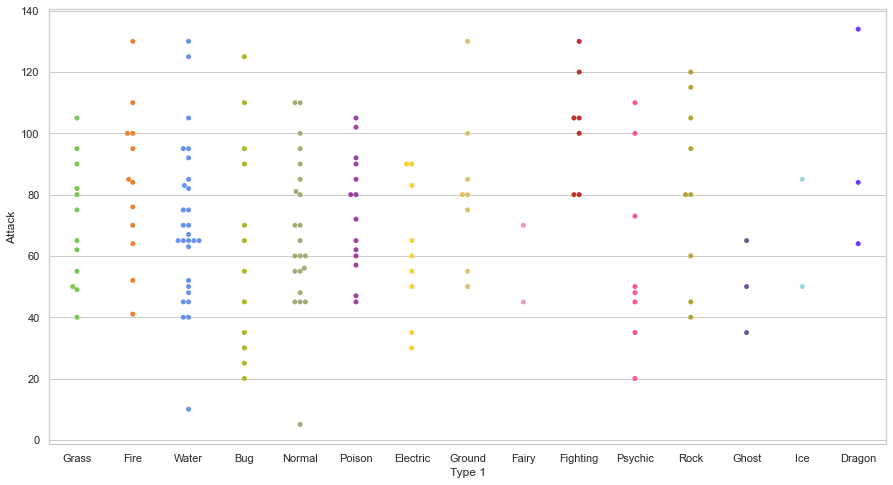

In [14]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

## Heatmap
Heatmaps help you visualize matrix-like data.

<AxesSubplot:>

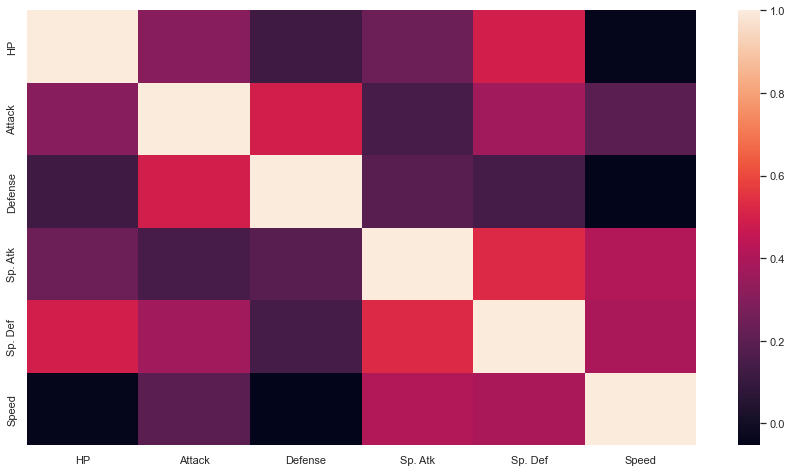

In [15]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)


## Histogram
Histograms allow you to plot the distributions of numeric variables.

<AxesSubplot:xlabel='Attack', ylabel='Density'>

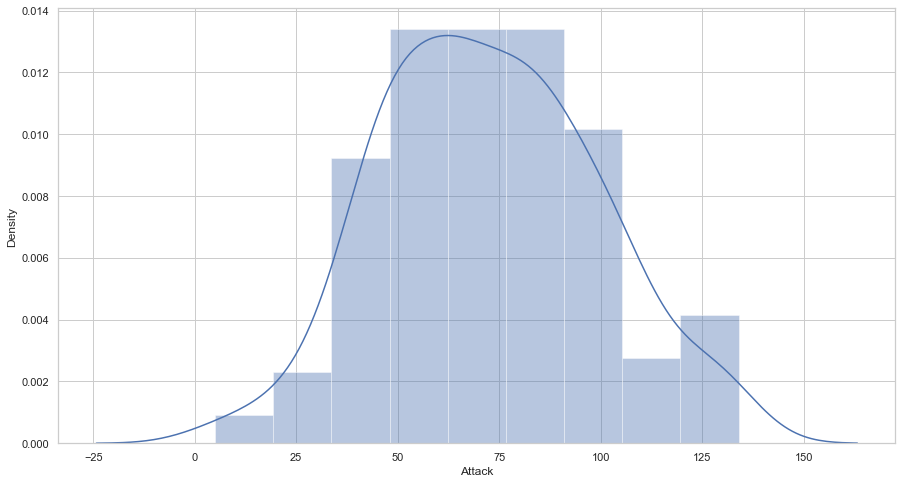

In [16]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

## Bar Plot
Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

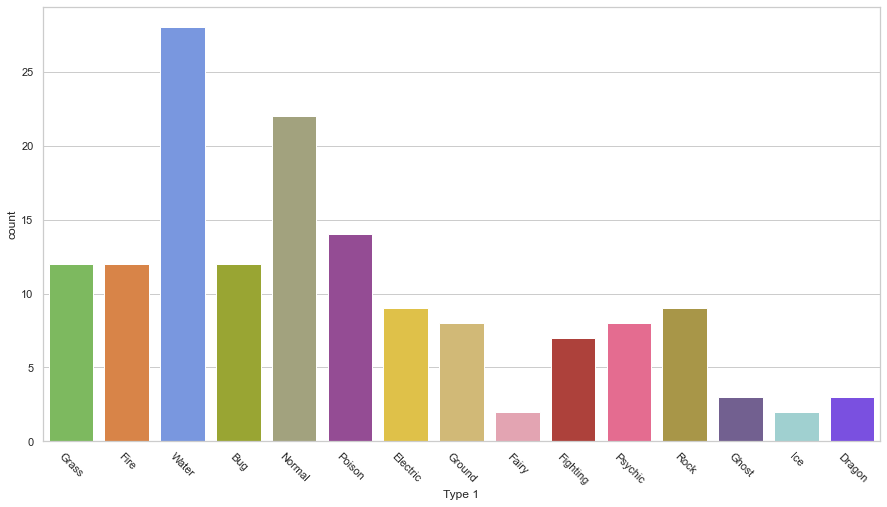

In [17]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Factor Plot
Factor plots make it easy to separate plots by categorical classes.

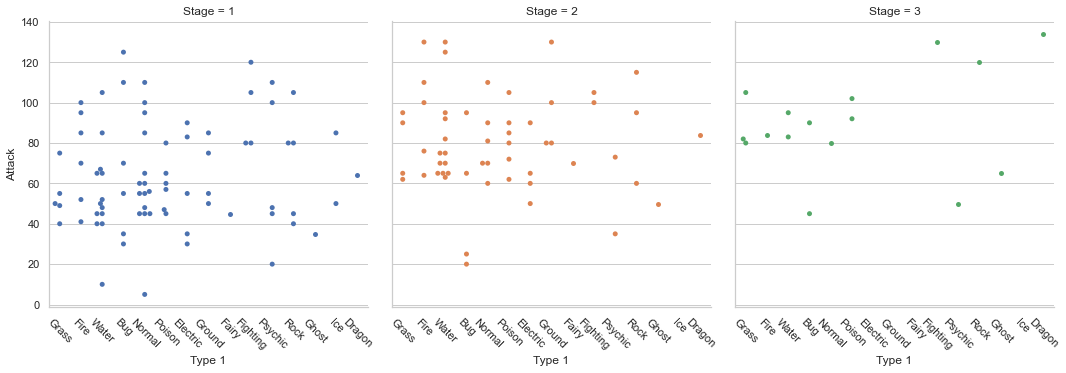

In [18]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

## Density Plot
Density plots display the distribution between two variables.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

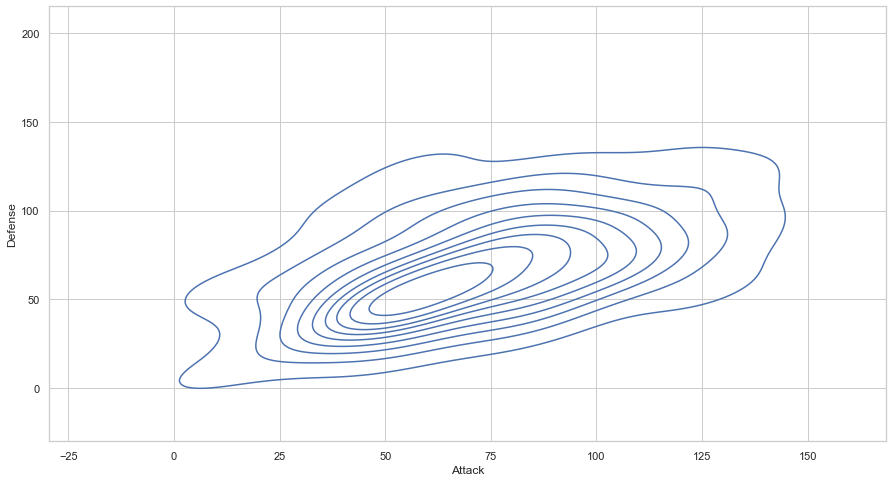

In [19]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

## Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

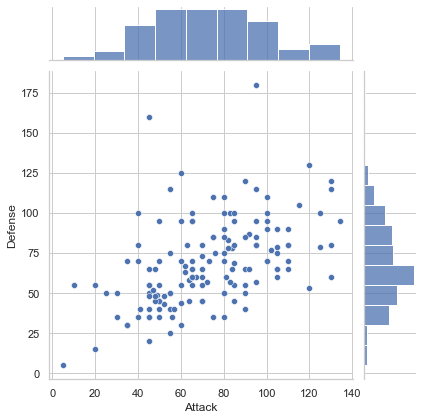

In [20]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)